In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nibabel
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.plotting import find_xyz_cut_coords
from glob import glob
from scipy.stats.stats import pearsonr
from nilearn.image import mean_img

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
db= pd.read_csv("../data/database.csv")
db.head()

Unnamed: 0                     stim  \
0           0  left-right_button_press   
1           1  left-right_button_press   
2           2  left-right_button_press   
3           3  left-right_button_press   
4           4  left-right_button_press   

                                                path  subject            task  
0  /storage/store/data/ibc/smooth_derivatives/sub...        1  archi_standard  
1  /storage/store/data/ibc/smooth_derivatives/sub...        2  archi_standard  
2  /storage/store/data/ibc/smooth_derivatives/sub...        4  archi_standard  
3  /storage/store/data/ibc/smooth_derivatives/sub...        5  archi_standard  
4  /storage/store/data/ibc/smooth_derivatives/sub...        6  archi_standard

In [3]:
mask_path = "/storage/store/data/ibc/derivatives/group/gm_mask.nii.gz"
masker_3d = NiftiMasker(
        mask_img=mask_path
        ).fit()

In [4]:
def extract_original_path(db, subject, stim):
    subjects_list = [ 1,  2,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14]
    i_subject = subjects_list[int(subject)]
    db_subject = db[db["subject"] == i_subject]
    original_path = db_subject[db_subject["stim"] == stim]["path"].values[0]
    return original_path
    
def extract_info(path):
    p = path.split("ibc")[1]
    subject = p.split("subject")[1].split("_stim")[0]
    stim = p.split("_stim_")[1].split("__")[0]
    task = p.split("__")[1].split("_exp")[0]
    algo = p.split("algo")[1].split("subject")[0]
    name = p.split("_algo")[0]
    return name, subject, stim, task, algo 

def sort(s_list, info_id=[0, 1, 2, 3, 4]):
    name_list = []
    for s in s_list:
        info = extract_info(s)
        info_list = [info[int(i)] for i in info_id]
        name_list.append("_".join(info_list))
    return np.array(s_list)[np.argsort(name_list)]

In [5]:
sort(glob("/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict*subject*"), info_id=[0, 2, 3, 4, 1])

array([ '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algohyperalignmentsubject0_stim_2back-0back__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algosrm_orthosubject0_stim_2back-0back__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algohyperalignmentsubject0_stim_body-avg__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algosrm_orthosubject0_stim_body-avg__hcp_wm_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algohyperalignmentsubject0_stim_complex-simple__language_nsp_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algosrm_orthosubject0_stim_complex-simple__language_nsp_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_algohyperalignmentsubject0_stim_computation-sentences__archi_standard_exp15.nii',
       '/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict_

('predict', '0', 'computation-sentences', 'archi_standard', 'hyperalignment')
(0.21294659830098869, 0.0)
('predict', '0', 'computation-sentences', 'archi_standard', 'ridgeCV')
(0.11364965173562137, 0.0)
('predict', '0', 'computation-sentences', 'archi_standard', 'srm_ortho')
(0.37351091470622183, 0.0)


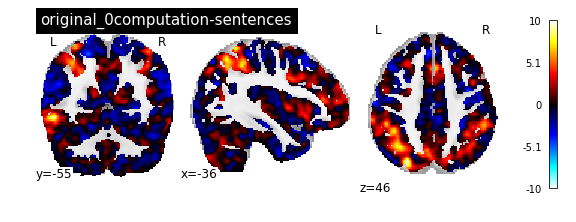

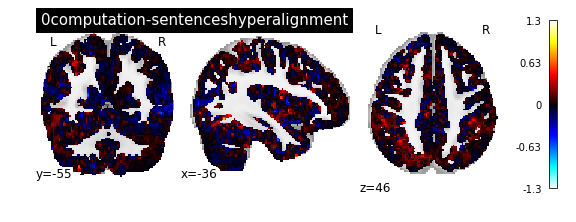

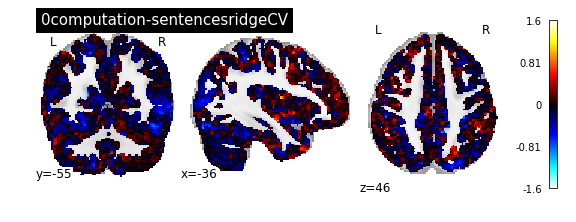

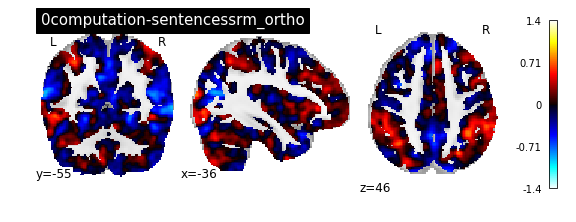

In [9]:
seen = set()
for path in sort(glob("/storage/workspace/hrichard/results/exp15/fuzzy_ibcpredict*algo*subject[0]_*computation-sentences*")):
    info = extract_info(path)
    print(info)
    name = "_".join(info)
    original_path = extract_original_path(db, info[1], info[2])
    if info[1] + info[2] not in seen:
        seen.add(info[1] + info[2])
        original_X = masker_3d.transform(original_path)
        original_img = masker_3d.inverse_transform(original_X)
        cut_xyz = find_xyz_cut_coords(original_img)
        plotting.plot_stat_map(original_img,
            cut_coords=cut_xyz,
            title = "original_" + info[1] + info[2],
            draw_cross=False
            )
        
    X = masker_3d.transform(path)
    img = masker_3d.inverse_transform(X)
    
    print(pearsonr(original_X.flatten(), X.flatten()))
    
    plotting.plot_stat_map(
    img,
    cut_coords=cut_xyz,
    title =info[1] + info[2] + info[-1],
    draw_cross=False
    )